In [1]:
cd ..

/Users/timothychan/marathon/marathon-repo


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('marathon/data/boston_combined.csv')

### Look at 2015, qualifiers only

In [4]:
df = df[(df['year']==2015) & df['qualifier']]

In [5]:
# Remove redundant columns (ie. columns we've selected on, and columns that are marathon/year features)
df = df[['bib', 'age', 'gender', 'offltime', 'elite', 'home']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21059 entries, 26437 to 52839
Data columns (total 6 columns):
bib         21059 non-null int64
age         21059 non-null int64
gender      21059 non-null bool
offltime    21059 non-null float64
elite       21059 non-null bool
home        21059 non-null object
dtypes: bool(2), float64(1), int64(2), object(1)
memory usage: 863.7+ KB


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso

/Users/timothychan/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
y = df['offltime'].values
X_df = df.drop('offltime', axis=1)
X_df = pd.get_dummies(X_df)
X = X_df.values
feature_names = X_df.columns
print X.shape, y.shape

(21059, 73) (21059,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)
print X_train.shape, X_test.shape

(15794, 73) (5265, 73)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)

training R2: 0.626801067848
testing R2: 0.596464439249


In [11]:
alpha = 0.1
model = Lasso(alpha = alpha)
model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)
print 
print 'Lasso Coefficients (alpha='+str(alpha)+')'
print '------------------'
print '{0:10}{1}'.format('intercept', model.intercept_)
for name, coef in zip(feature_names, model.coef_):
    if abs(coef) > 0.001:
        print '{0:10}{1}'.format(name, coef)

training R2: 0.617692579337
testing R2: 0.590596526737

Lasso Coefficients (alpha=0.1)
------------------
intercept 161.480035748
bib       0.00302244335579
age       0.300435111969
gender    2.36518335843
home_CAN  -1.19676807096
home_MA   -0.211343181506
home_UT   5.68369859782


In [12]:
# Finish model on entire data
model.fit(X, y)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)

training R2: 0.617910030469


[]

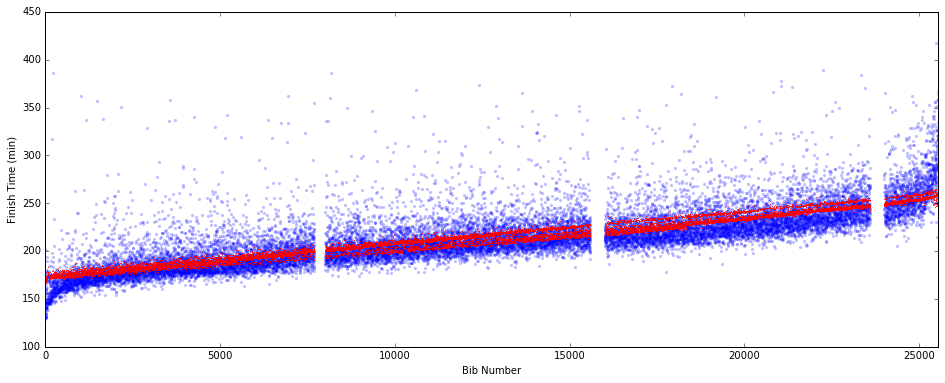

In [13]:
plt.figure(figsize=(16,6))
plt.scatter(X_df['bib'], y, s=10, linewidth=0, alpha=0.25)
plt.xlim(0, X_df['bib'].max())
plt.xlabel('Bib Number')
plt.ylabel('Finish Time (min)')

y_predict = model.predict(X)
plt.scatter(X_df['bib'], y_predict, color='r', linewidths=0, s=1, alpha=1)

plt.plot()

[]

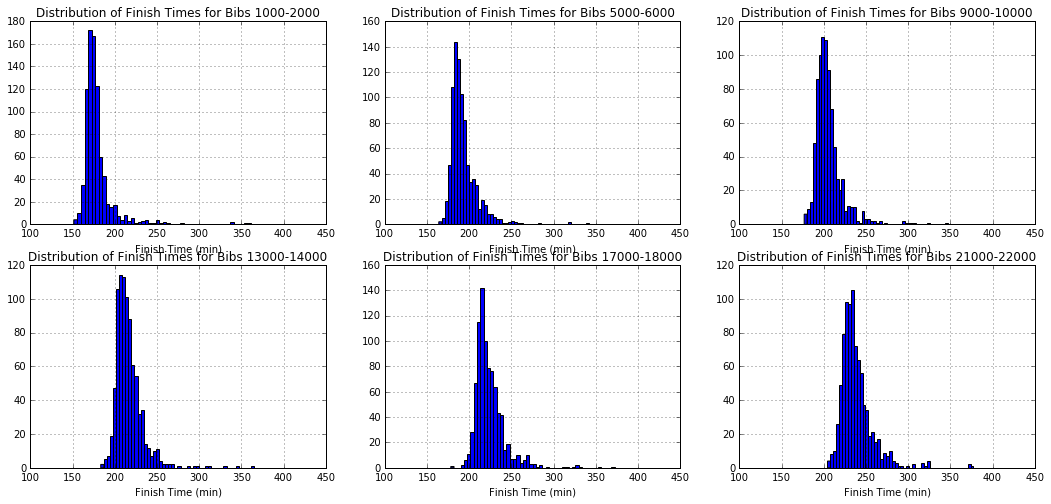

In [14]:
# Let's look at a slice of the data, and see distribution
plt.figure(figsize=(18, 8))
for ix, bibstart in enumerate(range(1000, 24000, 4000)):
    plt.subplot(2,3,ix+1)
    bibslice_df = df[df['bib'].isin(range(bibstart, bibstart+1000))]
    bibslice_df['offltime'].hist(bins=50)
    plt.title('Distribution of Finish Times for Bibs '+str(bibstart)+'-'+str(bibstart+1000))
    plt.xlabel('Finish Time (min)')
    plt.xlim(100, 450)

plt.plot()

[]

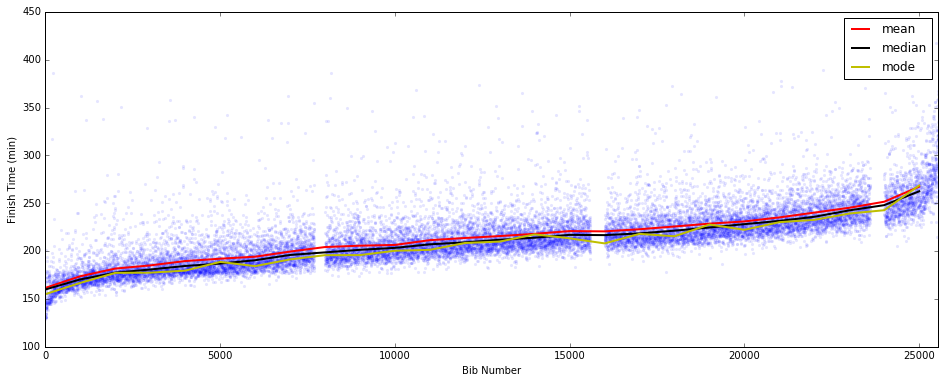

In [15]:
plt.figure(figsize=(16,6))
plt.scatter(X_df['bib'], y, s=10, linewidth=0, alpha=0.1)
plt.xlim(0, X_df['bib'].max())
plt.xlabel('Bib Number')
plt.ylabel('Finish Time (min)')

stats_df = pd.DataFrame()
for bib in range(df['bib'].min(), df['bib'].max(),1000):
    stats_df = stats_df.append([[bib, 
                                 df[df['bib'].isin(range(bib-500, bib+500))]['offltime'].median(),
                                 df[df['bib'].isin(range(bib-500, bib+500))]['offltime'].mean(),
                                 df[df['bib'].isin(range(bib-500, bib+500))]['offltime'].mode().mean(),
                                ]])
stats_df.columns = ['bib', 'median', 'mean', 'mode']
plt.plot(stats_df['bib'], stats_df['mean'], color='r', linewidth=2, alpha=1)
plt.plot(stats_df['bib'], stats_df['median'], color='k', linewidth=2, alpha=1)
plt.plot(stats_df['bib'], stats_df['mode'], color='y', linewidth=2, alpha=1)
plt.legend()
plt.plot()

18.7214963683


[]

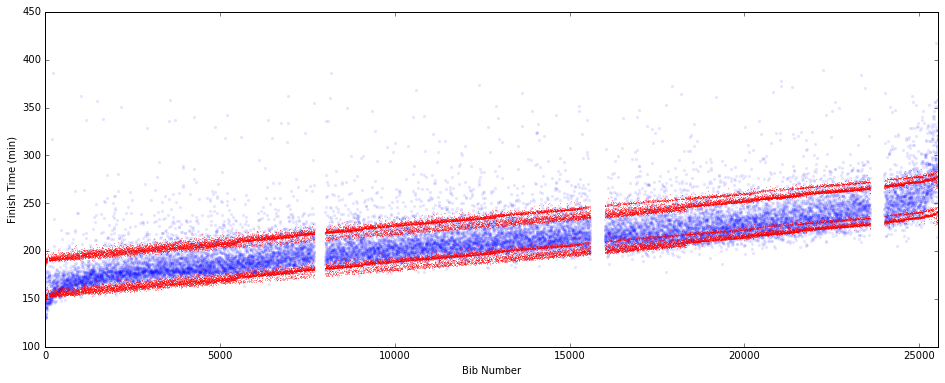

In [16]:
# I like the median.  Looks closer to the visual average
# Now calculate the standard deviation of prediction error
# Identify runners 
stddev = np.var(y - y_predict)**0.5
print stddev

plt.figure(figsize=(16,6))
plt.scatter(X_df['bib'], y, s=10, linewidth=0, alpha=0.1)
plt.xlim(0, X_df['bib'].max())
plt.xlabel('Bib Number')
plt.ylabel('Finish Time (min)')

plt.scatter(X_df['bib'], y_predict + stddev, s=1, c='r', linewidth=0, alpha=0.5)
plt.scatter(X_df['bib'], y_predict - stddev, s=1, c='r', linewidth=0, alpha=0.5)
# plt.plot(stats_df['bib'], stats_df['median'], color='k', linewidth=2, alpha=1)
plt.plot()

18.7214963683


[]

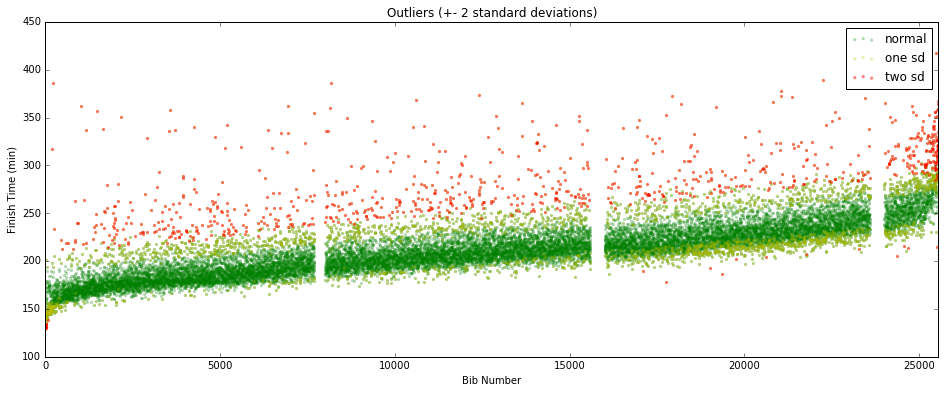

In [17]:
# Plot runners outside of 2 stddev
stddev = np.var(y - y_predict)**0.5
print stddev

plt.figure(figsize=(16,6))
outliers = abs(y_predict - y) > 2*stddev
one_sd = abs(y_predict - y) > stddev
normals = np.array([not outlier for outlier in outliers])
plt.scatter(X_df.loc[normals, 'bib'], y[normals], s=10, linewidth=0, alpha=0.3, c='g')
plt.scatter(X_df.loc[one_sd, 'bib'], y[one_sd], s=10, linewidth=0, alpha=0.3, c='y')
plt.scatter(X_df.loc[outliers, 'bib'], y[outliers], s=10, linewidth=0, alpha=0.5, c='r')
plt.xlim(0, X_df['bib'].max())
plt.xlabel('Bib Number')
plt.ylabel('Finish Time (min)')
plt.title('Outliers (+- 2 standard deviations)')
plt.legend(['normal', 'one sd', 'two sd'])
plt.plot()

In [18]:
print 'Number of runners:', len(X_df)
print 'Number of outliers:', len(X_df.loc[outliers])
print 'Number of outliers faster than predicted:', len(X_df[(y_predict - y) > 2*stddev])
print 'Number of outliers slower than predicted:', len(X_df[(y - y_predict) > 2*stddev])

Number of runners: 21059
Number of outliers: 868
Number of outliers faster than predicted: 25
Number of outliers slower than predicted: 843


58


[]

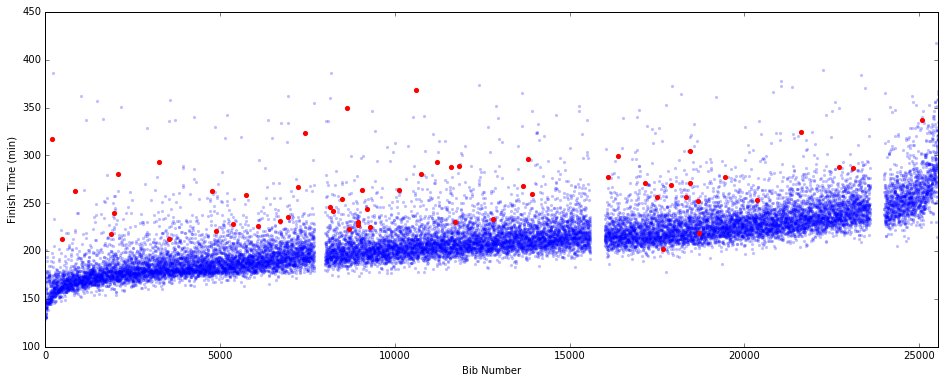

In [19]:
# Actual Cheaters
cheaters = set([199, 346, 468, 845, 1866, 1973, 2073, 2951, 3250, 3526, 4762, 4875, 5377, 5743, 6086, 6716, 6945, 7229, 7433, 8133, 8229, 8486, 8626, 8697, 8939, 8959, 9065, 9194, 10131, 10618, 10760, 11203, 11618, 11839, 12819, 13677, 13799, 13936, 16107, 16388, 17507, 17658, 17908, 18328, 18454, 18455, 18694, 18696, 19455, 20361, 21631, 22714, 23116, 25081, 17151, 9300, 18673, 11715])
print len(cheaters)
cheaters_df = X_df[X_df['bib'].isin(cheaters)]

plt.figure(figsize=(16,6))
plt.scatter(X_df['bib'], y, s=10, linewidth=0, alpha=0.25)
plt.xlim(0, X_df['bib'].max())
plt.xlabel('Bib Number')
plt.ylabel('Finish Time (min)')

plt.scatter(df.loc[df['bib'].isin(cheaters), 'bib'], df.loc[df['bib'].isin(cheaters), 'offltime'], color='r', 
            linewidths=2, s=10, alpha=1)
plt.plot()

In [20]:
# Let's cluster these runners on split times
df15 = pd.read_csv('marathon/data/boston2015_clean.csv')
outlier_bibs = set(X_df.loc[outliers, 'bib'])
outliers_df = df15[df15['bib'].isin(outlier_bibs)]
# Remove elites
outliers_df = outliers_df[outliers_df['bib'] > 100]
print len(outliers_df)

855


In [21]:
outliers_df = outliers_df[['bib', 'age', 'gender', 'time5k', 'time10k', 'time15k', 'time20k', 'timehalf', 
                           'time25k', 'time30k', 'time35k', 'time40k', 'offltime']]
outliers_df.head().T

,59,60,61,64,132
bib,20510,25510,24185,12944,11260
age,65,70,67,51,49
gender,True,False,True,True,True
time5k,29.15,32.6667,30.8833,24.05,34.4667
time10k,59.0167,66.15,63.1333,47.5333,70.75
time15k,90.7333,99.9333,96.6667,71.45,103.183
time20k,124.8,134.283,132.333,97.8167,140.117
timehalf,132.283,141.6,140.733,103.167,150.083
time25k,159.95,170,168.883,122.85,177.867
time30k,196.517,207.333,208.65,150.767,218.383


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
X_outliers = StandardScaler().fit_transform(outliers_df)

In [24]:
print outliers_df.shape
print X_outliers.shape

(855, 13)
(855, 13)


In [25]:
model = KMeans(n_clusters = 3, max_iter=10, n_jobs=-1)
model.fit(X_outliers)

KMeans(copy_x=True, init='k-means++', max_iter=10, n_clusters=3, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [26]:
from sklearn import decomposition

[]

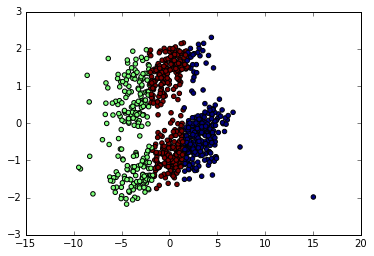

In [27]:
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X_outliers)
plt.scatter(X_pca[:,0], X_pca[:,1], c=model.labels_)
plt.plot()

In [28]:
outliers_df[X_pca[:,0] > 10]

,bib,age,gender,time5k,time10k,time15k,time20k,timehalf,time25k,time30k,time35k,time40k,offltime
7218,13313,61,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247.683333,259.816667


In [29]:
outliers_df = outliers_df.loc[X_pca[:,0] < 10]
print outliers_df.shape

(854, 13)


Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 3837.331
Iteration  0, inertia 3252.191
Initialization complete
Iteration  0, inertia 3572.727
Iteration  1, inertia 2820.894
Iteration  1, inertia 2507.718
Iteration  0, inertia 3458.542
Iteration  1, inertia 2869.340
Iteration  2, inertia 2684.233
Iteration  2, inertia 2465.118
Iteration  1, inertia 2703.333
Iteration  2, inertia 2607.763
Iteration  3, inertia 2628.795
Iteration  2, inertia 2570.922
Iteration  4, inertia 2596.312
Iteration  3, inertia 2488.557
Iteration  3, inertia 2457.606
Iteration  3, inertia 2524.336
Iteration  4, inertia 2457.190
Iteration  4, inertia 2454.246
Initialization complete
Iteration  4, inertia 2495.414
Initialization complete
Iteration  0, inertia 3855.351
Initialization complete
Iteration  0, inertia 3088.116
Initialization complete
Iteration  1, inertia 2819.747
Iteration  0, inertia 2979.342
Iteration  2, inertia 2672.036
Iteration  1, inertia 2582.178
It

[]

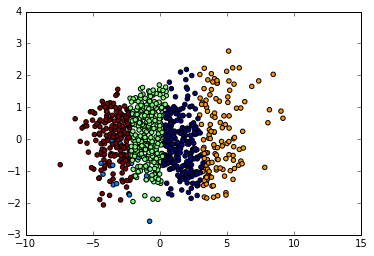

In [30]:
X_outliers = StandardScaler().fit_transform(outliers_df.drop(['bib', 'offltime', 'gender'], axis=1))
model = KMeans(n_clusters = 5, max_iter=5, n_jobs=-1, verbose=True)
model.fit(X_outliers)

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_outliers)
plt.scatter(X_pca[:,0], X_pca[:,1], c=model.labels_)
plt.plot()

[]

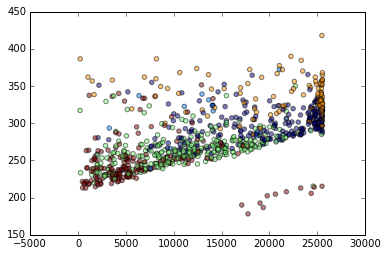

In [31]:
plt.scatter(outliers_df['bib'], outliers_df['offltime'], alpha=0.5, c=model.labels_)
plt.plot()

In [32]:
print 'Number of labelled cheaters:',len(cheaters), '/', len(df)
print 'number of cheaters in outliers:',sum(outliers_df['bib'].isin(cheaters)), '/', len(outliers_df)
y = np.bincount(model.labels_)
print 'Cheaters in Clusters'
for label,binsize in enumerate(y):
    bib_number = outliers_df.loc[model.labels_ == label, 'bib'].isin(cheaters)
    print label, sum(bib_number), '/', binsize, sum(bib_number)*100./binsize

Number of labelled cheaters: 58 / 21059
number of cheaters in outliers: 35 / 854
Cheaters in Clusters
0 10 / 234 4.2735042735
1 2 / 14 14.2857142857
2 14 / 292 4.79452054795
3 5 / 128 3.90625
4 4 / 186 2.15053763441
